# Maschinelles Lernens
# Aufgabenblatt 06 zur PCA - Aufgabe 01
# Prof. Dr. Sarah Brockhaus

In [1]:
# Required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Aufgabe 1.1

In [2]:
# Read CSV data
sieben = pd.read_csv("siebenkampf.csv", sep=";", decimal=",")
sieben.head()

,Unnamed: 0,Platzierung,Name,Punkte85,Land,Gebutsdatum,jahr,wettkamp,Zeit_100m_Huerden,Hochsprung,Kugelstoßen,Zeit_200m_Lauf,Weitsprung,Speerwurf,Zeit_800m_Lauf_Minute,Zeit_800m_Lauf_Sekunden,Quelle
0,1,1,Glynis Nunn,6387,Austr.,1960-12-04,1984,Olympische Spiele,13.02,1.80,12.82,24.06,6.66,35.58,7800,130.57,sports-reference.com
1,2,2,Jackie Joyner-Kersee,6363,USA,1962-03-03,1984,Olympische Spiele,13.63,1.80,14.39,24.05,6.11,44.52,7980,133.03,sports-reference.com
2,3,3,Sabine Everts,6388,BRD,1961-03-04,1984,Olympische Spiele,13.54,1.89,12.49,24.05,6.71,32.62,7740,129.05,sports-reference.com
3,4,4,Cindy Greiner,6249,USA,1957-02-15,1984,Olympische Spiele,13.71,1.83,13.36,24.40,6.15,40.86,7860,131.75,sports-reference.com
4,5,5,Judy Livermore-Simpson,6264,GB,1960-11-14,1984,Olympische Spiele,13.07,1.86,13.86,24.95,6.33,33.64,7980,133.01,sports-reference.com


In [3]:
# Selected disciplines
disziplinen = ["Hochsprung", "Weitsprung", "Zeit_100m_Huerden", "Zeit_200m_Lauf",
               "Zeit_800m_Lauf_Minute", "Kugelstoßen", "Speerwurf"]
sieben_dis = sieben[disziplinen]
sieben_dis.head()
sieben_dis.describe()

,Hochsprung,Weitsprung,Zeit_100m_Huerden,Zeit_200m_Lauf,Zeit_800m_Lauf_Minute,Kugelstoßen,Speerwurf
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,1.802686,6.308476,13.535381,24.366952,8003.714286,14.076524,44.765190
std,0.137593,0.282254,0.417532,1.003292,259.789231,1.128756,4.889558
min,0.000000,5.350000,12.540000,22.560000,7440.000000,11.430000,31.900000
25%,1.780000,6.120000,13.302500,23.922500,7800.000000,13.295000,41.872500
50%,1.810000,6.300000,13.530000,24.275000,7980.000000,14.040000,44.515000
75%,1.840000,6.480000,13.725000,24.785000,8160.000000,14.700000,47.837500
max,1.950000,7.270000,16.620000,35.080000,8880.000000,17.310000,56.350000


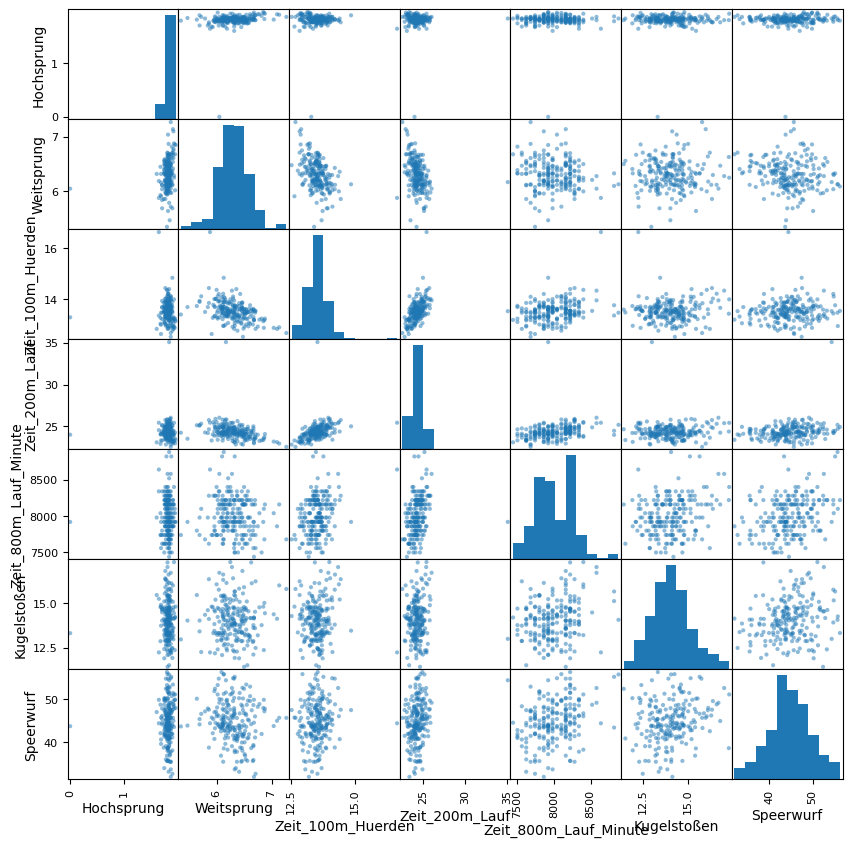

In [4]:
plt_info = pd.plotting.scatter_matrix(sieben_dis, figsize=(10,10))

## Aufgabe 1.2

In [5]:
# Preprocessing

# Filtering outliers
sieben_dis1 = sieben_dis[(sieben_dis["Hochsprung"] != 0) &
                         (sieben_dis["Zeit_100m_Huerden"] <= 15) &
                         (sieben_dis["Zeit_200m_Lauf"] <= 30)]

sieben_dis1.head()

,Hochsprung,Weitsprung,Zeit_100m_Huerden,Zeit_200m_Lauf,Zeit_800m_Lauf_Minute,Kugelstoßen,Speerwurf
0,1.80,6.66,13.02,24.06,7800,12.82,35.58
1,1.80,6.11,13.63,24.05,7980,14.39,44.52
2,1.89,6.71,13.54,24.05,7740,12.49,32.62
3,1.83,6.15,13.71,24.40,7860,13.36,40.86
4,1.86,6.33,13.07,24.95,7980,13.86,33.64


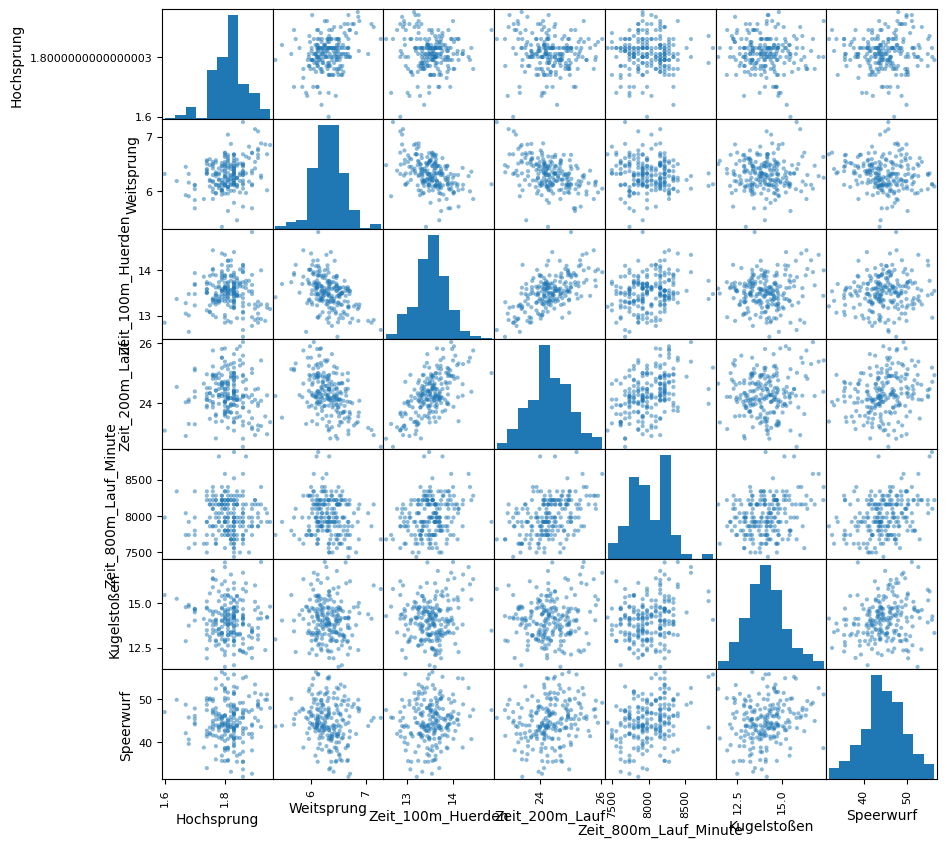

In [6]:
# visualize the data 
plt_info = pd.plotting.scatter_matrix(sieben_dis1, figsize=(10,10))

## Aufgabe 1.3

In [7]:
# Reverse variables where larger is better
### reverse_vars = ["Hochsprung", "Weitsprung", "Kugelstoßen", "Speerwurf"]
reverse_vars = ["Zeit_100m_Huerden", "Zeit_200m_Lauf", "Zeit_800m_Lauf_Minute"]
# sieben_dis1[reverse_vars] = sieben_dis1[reverse_vars].max() - sieben_dis1[reverse_vars]
reversed_vars = sieben_dis1[reverse_vars].max() - sieben_dis1[reverse_vars]

reversed_vars.head()

# Summary
#print(sieben_dis1.describe())

,Zeit_100m_Huerden,Zeit_200m_Lauf,Zeit_800m_Lauf_Minute
0,1.82,1.98,1080.0
1,1.21,1.99,900.0
2,1.30,1.99,1140.0
3,1.13,1.64,1020.0
4,1.77,1.09,900.0


In [8]:
sieben_dis1[reverse_vars].max()

Zeit_100m_Huerden          14.84
Zeit_200m_Lauf             26.04
Zeit_800m_Lauf_Minute    8880.00
dtype: float64

In [9]:
# put together the original variables and the reversed variables
orig_vars = list(set(disziplinen) - set(reverse_vars)) 
sieben_dis2 = pd.concat([reversed_vars, sieben_dis1[orig_vars]], axis=1)
sieben_dis2.head()

,Zeit_100m_Huerden,Zeit_200m_Lauf,Zeit_800m_Lauf_Minute,Speerwurf,Kugelstoßen,Hochsprung,Weitsprung
0,1.82,1.98,1080.0,35.58,12.82,1.80,6.66
1,1.21,1.99,900.0,44.52,14.39,1.80,6.11
2,1.30,1.99,1140.0,32.62,12.49,1.89,6.71
3,1.13,1.64,1020.0,40.86,13.36,1.83,6.15
4,1.77,1.09,900.0,33.64,13.86,1.86,6.33


## Aufgabe 1.4

In [10]:
# Standardize variables
scaler = StandardScaler()
sieben_dis2_stand = pd.DataFrame(scaler.fit_transform(sieben_dis2[disziplinen]), columns=disziplinen)
sieben_dis2_stand.head()

,Hochsprung,Weitsprung,Zeit_100m_Huerden,Zeit_200m_Lauf,Zeit_800m_Lauf_Minute,Kugelstoßen,Speerwurf
0,-0.213097,1.235548,1.393349,0.374169,0.783465,-1.134550,-1.879377
1,-0.213097,-0.719792,-0.301134,0.389033,0.083419,0.263325,-0.042183
2,1.378725,1.413306,-0.051128,0.389033,1.016813,-1.428371,-2.487666
3,0.317510,-0.577585,-0.523361,-0.131185,0.550116,-0.653753,-0.794323
4,0.848118,0.062344,1.254457,-0.948671,0.083419,-0.208569,-2.278053


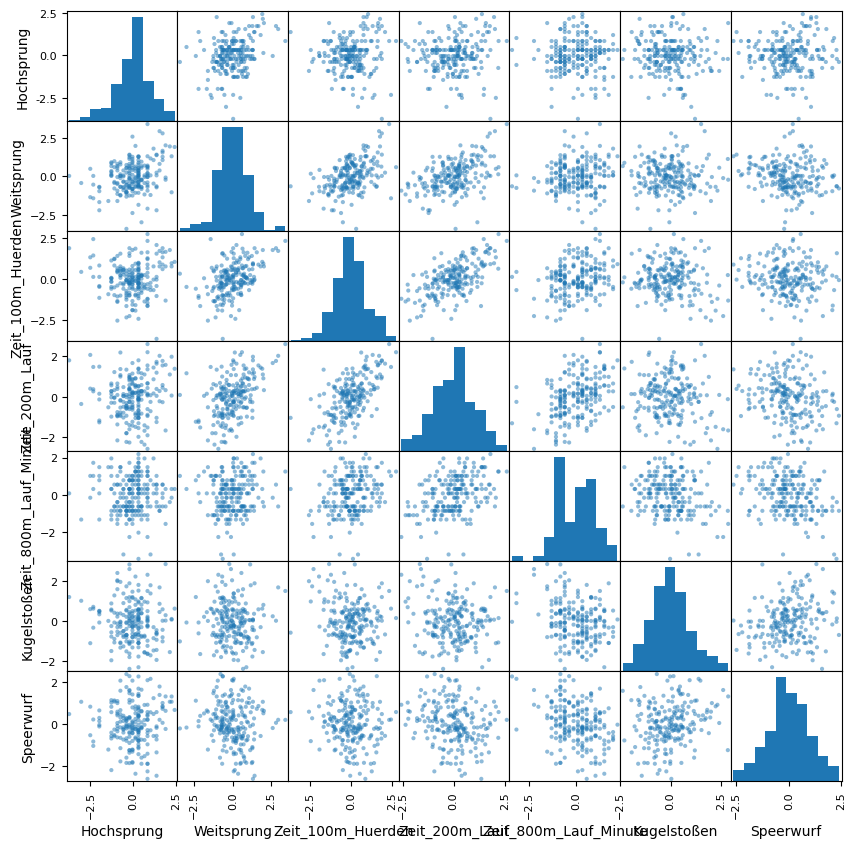

In [11]:
# visualize the partially reversed and standardized data 
plt_info = pd.plotting.scatter_matrix(sieben_dis2_stand, figsize=(10,10))

In [12]:
# Correlation matrix
cor_matrix = sieben_dis2_stand.corr()
cor_matrix

,Hochsprung,Weitsprung,Zeit_100m_Huerden,Zeit_200m_Lauf,Zeit_800m_Lauf_Minute,Kugelstoßen,Speerwurf
Hochsprung,1.000000,0.303875,0.038046,0.074624,-0.017674,-0.088856,0.040038
Weitsprung,0.303875,1.000000,0.446543,0.461323,0.103889,-0.003818,-0.149629
Zeit_100m_Huerden,0.038046,0.446543,1.000000,0.607173,0.254904,-0.112785,-0.108368
Zeit_200m_Lauf,0.074624,0.461323,0.607173,1.000000,0.407675,-0.121394,-0.215103
Zeit_800m_Lauf_Minute,-0.017674,0.103889,0.254904,0.407675,1.000000,-0.252606,-0.335658
Kugelstoßen,-0.088856,-0.003818,-0.112785,-0.121394,-0.252606,1.000000,0.205615
Speerwurf,0.040038,-0.149629,-0.108368,-0.215103,-0.335658,0.205615,1.000000


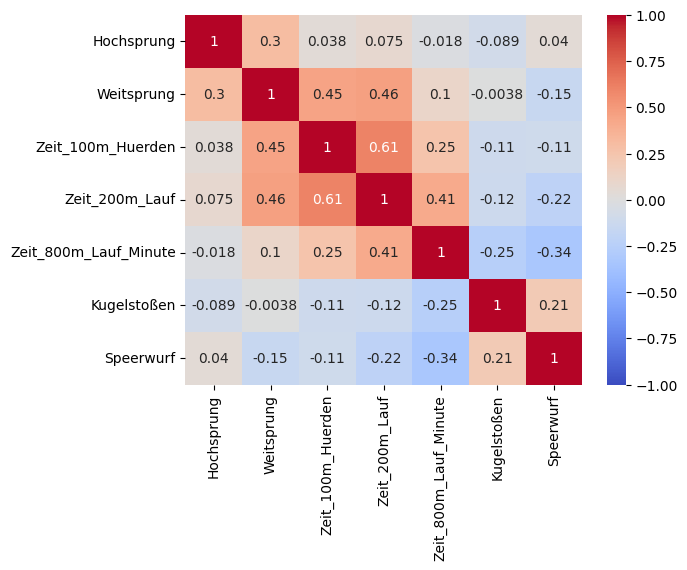

In [13]:
# Plot correlation matrix
sns.heatmap(cor_matrix, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

## Aufgabe 1.5

In [14]:
# Principal Component Analysis (PCA)
pca_stand = PCA() # whiten = True
pca_stand.fit(sieben_dis2_stand)
pcs = np.round(pca_stand.components_, decimals = 2)
pcs

array([[-0.14, -0.43, -0.49, -0.54, -0.39,  0.21,  0.29],
       [ 0.44,  0.45,  0.19,  0.08, -0.43,  0.42,  0.46],
       [-0.74, -0.06,  0.3 ,  0.23,  0.01,  0.54,  0.12],
       [ 0.11,  0.25, -0.3 , -0.11, -0.01,  0.55, -0.72],
       [-0.33,  0.26,  0.19, -0.11, -0.72, -0.39, -0.32],
       [ 0.35, -0.69,  0.45,  0.16, -0.27,  0.15, -0.28],
       [-0.02, -0.11, -0.56,  0.77, -0.27, -0.07,  0.02]])

In [15]:
# Output of principal components:
df_loadings = pd.DataFrame(data = np.transpose(pcs), # take care of dimensions
                      columns = ['PC 1' , 'PC 2' , 'PC 3' , 'PC 4' , 'PC 5' , 'PC 6' , 'PC 7' ], 
                     index = disziplinen)
df_loadings

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7
Hochsprung,-0.14,0.44,-0.74,0.11,-0.33,0.35,-0.02
Weitsprung,-0.43,0.45,-0.06,0.25,0.26,-0.69,-0.11
Zeit_100m_Huerden,-0.49,0.19,0.30,-0.30,0.19,0.45,-0.56
Zeit_200m_Lauf,-0.54,0.08,0.23,-0.11,-0.11,0.16,0.77
Zeit_800m_Lauf_Minute,-0.39,-0.43,0.01,-0.01,-0.72,-0.27,-0.27
Kugelstoßen,0.21,0.42,0.54,0.55,-0.39,0.15,-0.07
Speerwurf,0.29,0.46,0.12,-0.72,-0.32,-0.28,0.02


### Moegliche Interpretation 
#### PC1: Schnelligkeit
     -- Weitsprung, 100m_Huerde, 200m, (800m); vs 
     ++ Kugel und Speer

#### PC2: Kraft (nicht Ausdauer)
     ++ Weitsprung, Hochsprung, Kugel, Speer
     -- 800m

#### PC3: nicht Hochsprung
     ++ Kugel
     -- Hochsprung

## Aufgabe 1.6

In [16]:
#  proportion of varince explained
pca_stand.explained_variance_ratio_

array([0.34103571, 0.18796053, 0.14946621, 0.11477451, 0.09398648,
       0.06153243, 0.05124413])

In [17]:
# cumulative proportion of varince explained
np.cumsum(pca_stand.explained_variance_ratio_)

array([0.34103571, 0.52899625, 0.67846246, 0.79323697, 0.88722345,
       0.94875587, 1.        ])

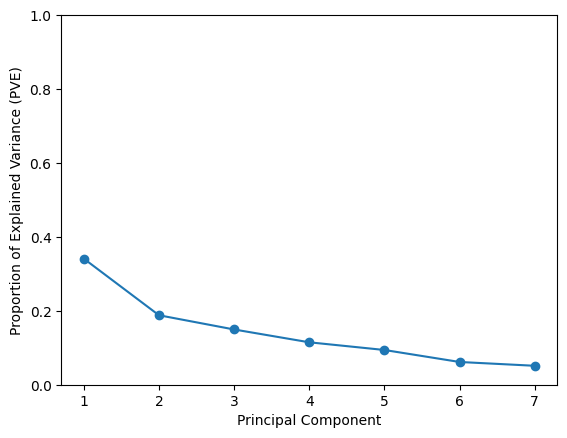

In [18]:
# Plot explained variance ratio
plt.plot(np.arange(1, len(pca_stand.explained_variance_ratio_) + 1), pca_stand.explained_variance_ratio_, marker="o")
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Explained Variance (PVE)")
plt.ylim([0, 1])
plt.show()

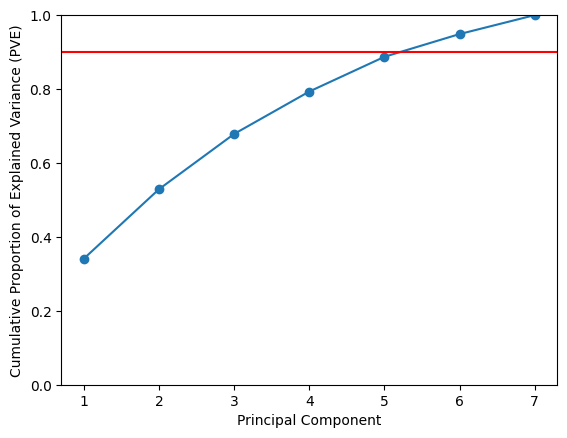

In [19]:
plt.plot(np.arange(1, len(pca_stand.explained_variance_ratio_) + 1), np.cumsum(pca_stand.explained_variance_ratio_), marker="o")
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Proportion of Explained Variance (PVE)")
plt.ylim([0, 1])
plt.axhline(y=0.9, color="red")
plt.show()

## Aufgabe 1.7

In [20]:
# transform the data: get the data on PC1, PC2, and PC3 
PC1 = pca_stand.fit_transform(sieben_dis2_stand)[:,0]
PC2 = pca_stand.fit_transform(sieben_dis2_stand)[:,1]
PC3 = pca_stand.fit_transform(sieben_dis2_stand)[:,2]
pca_stand.fit_transform(sieben_dis2_stand)

array([[-2.45526493, -0.91755809, -0.24419284, ...,  1.11053049,
        -0.11071206, -0.79259978],
       [ 0.28327011, -0.38297789,  0.34177937, ..., -0.3670452 ,
         0.37772401,  0.51194517],
       [-2.37867734, -0.9160141 , -2.08492768, ...,  0.49442658,
        -0.25668502, -0.09022156],
       ...,
       [ 1.86884697,  0.49906674,  0.92725224, ...,  0.22750505,
         0.54369966, -0.53268121],
       [-0.86651862, -2.22369856,  1.57026371, ..., -0.06469174,
        -1.02965417, -0.26370935],
       [ 2.35073628, -0.57971668, -2.54512589, ..., -1.40710233,
        -1.19977409,  1.23950838]])

## Aufgabe 1.8

Biplot of the PCA created in R
![](pca_biplot_siebenkampf.png)